**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Shopping dataset/superstore_data.csv')
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


**DATA PREPROCESSING**

In [ ]:
df.drop(columns='Id', inplace=True)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,...,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,...,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,...,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
#Checking for the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Education           5
Marital_Status      8
Dt_Customer       663
dtype: int64

In [ ]:
# Extract the last four digits from the date when the customer got enrolled with the company ie 'Dt_Customer' column
df['Dt_Customer'] = df['Dt_Customer'].str[-4:]
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,2014,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,2014,0,464,5,...,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,2014,0,134,11,...,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,2014,0,10,0,...,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,2014,0,6,16,...,11,0,34,2,3,1,2,7,1,0


**PERFORMING THE EXPLORATORY DATA ANALYSIS**

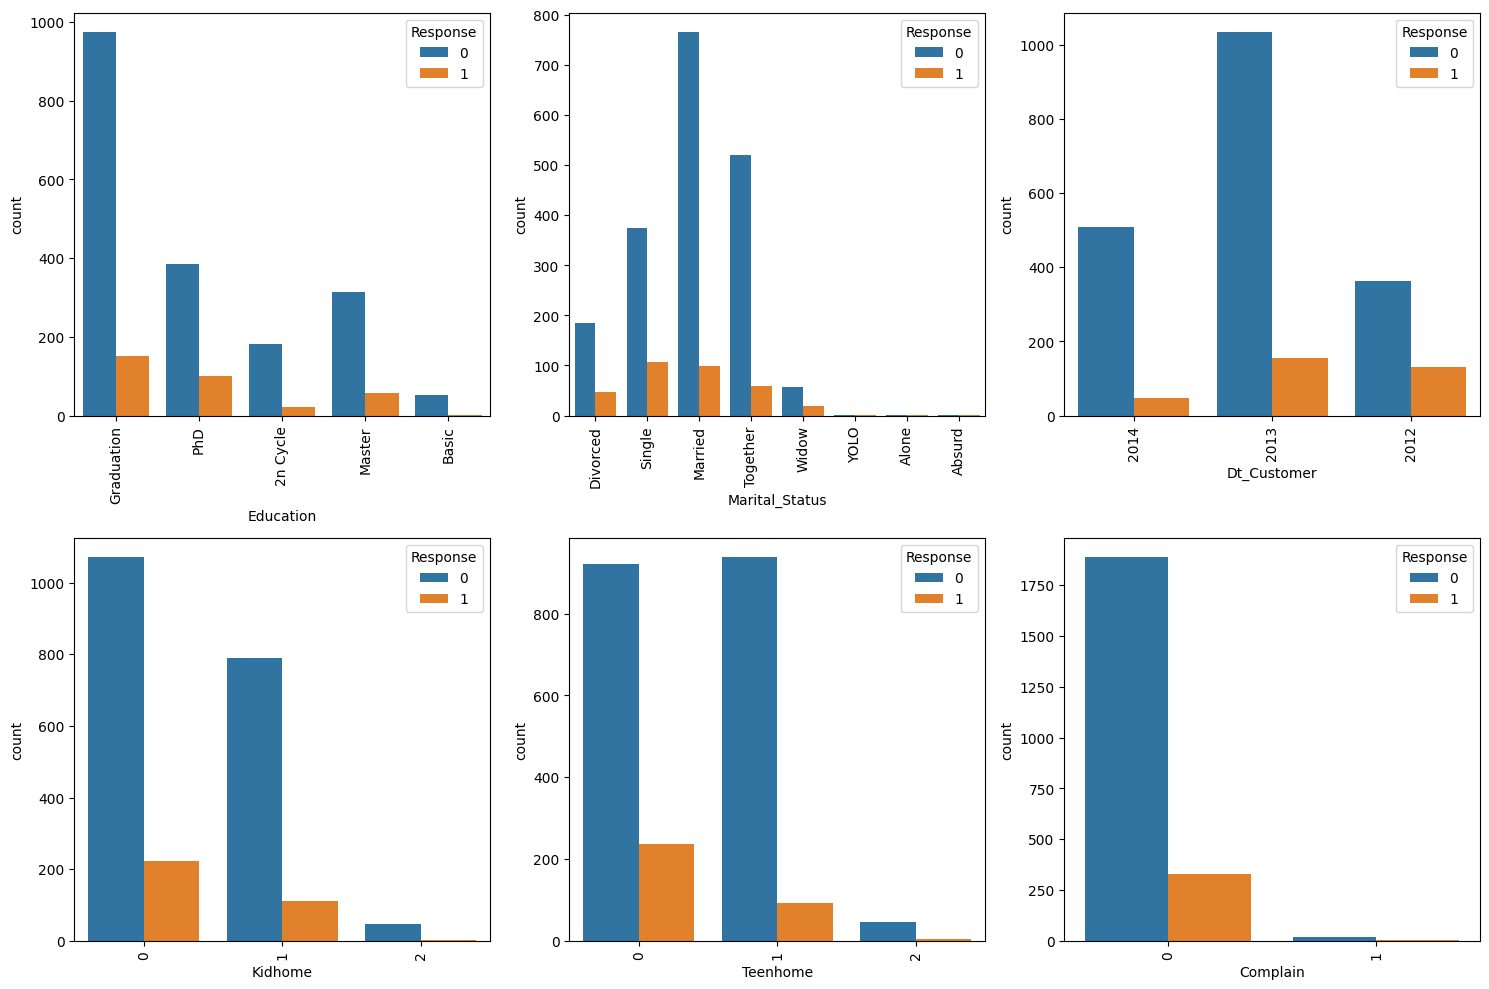

In [ ]:
# list of categorical variables to plot
cat_vars = ['Education', 'Marital_Status', 'Dt_Customer',
            'Kidhome', 'Teenhome', 'Complain']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Response', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

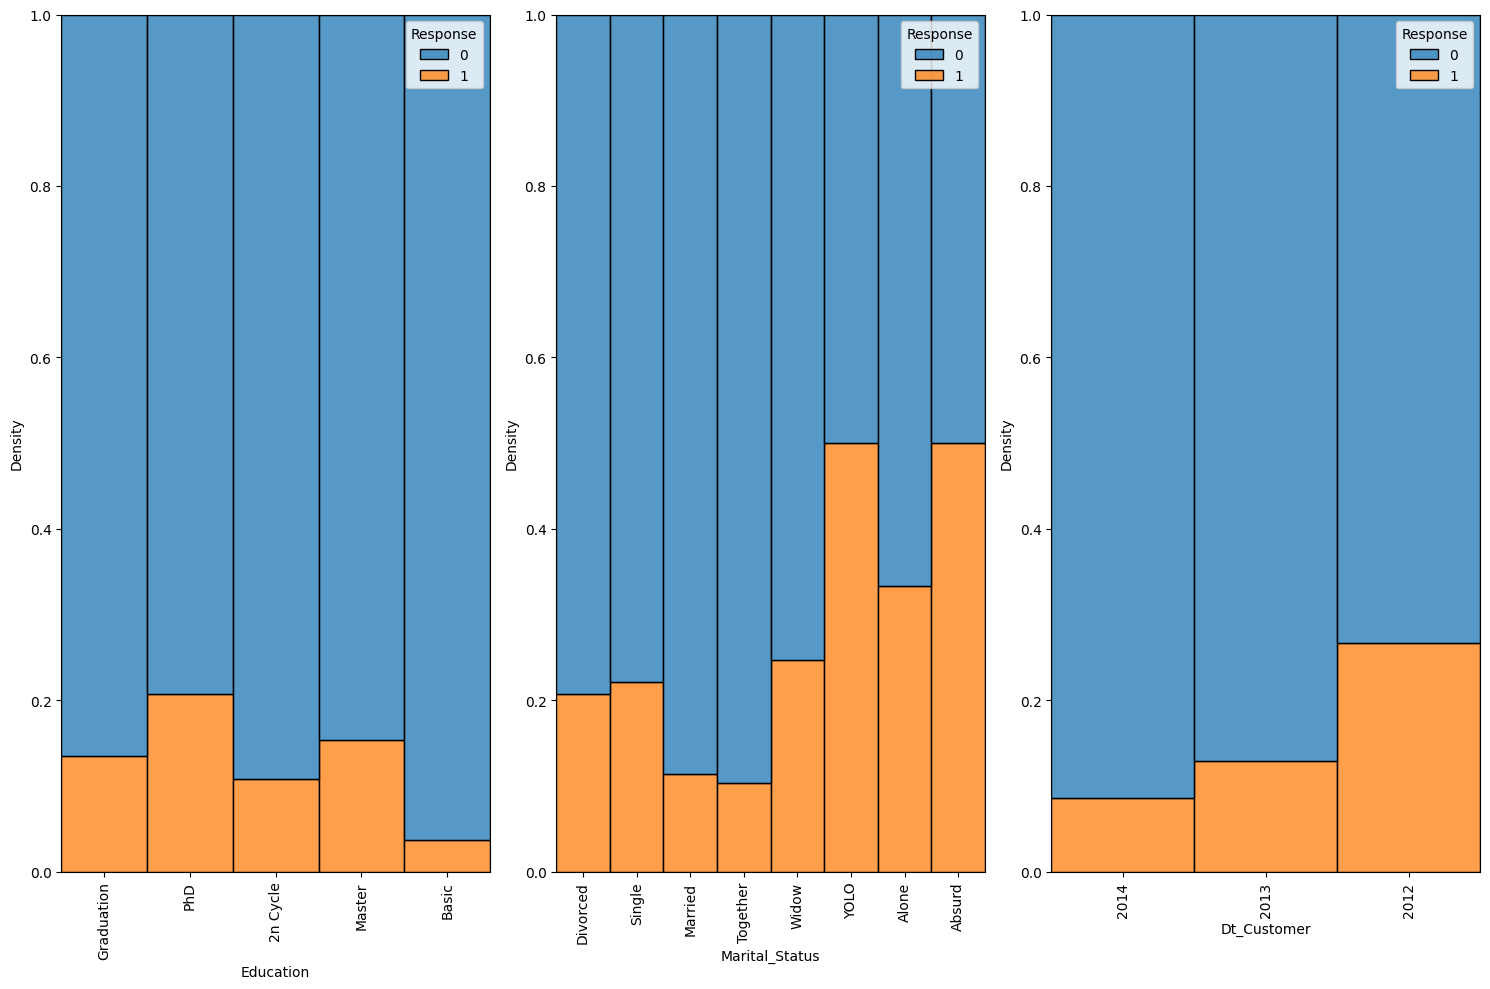

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_vars = ['Education', 'Marital_Status', 'Dt_Customer']

# create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Response', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

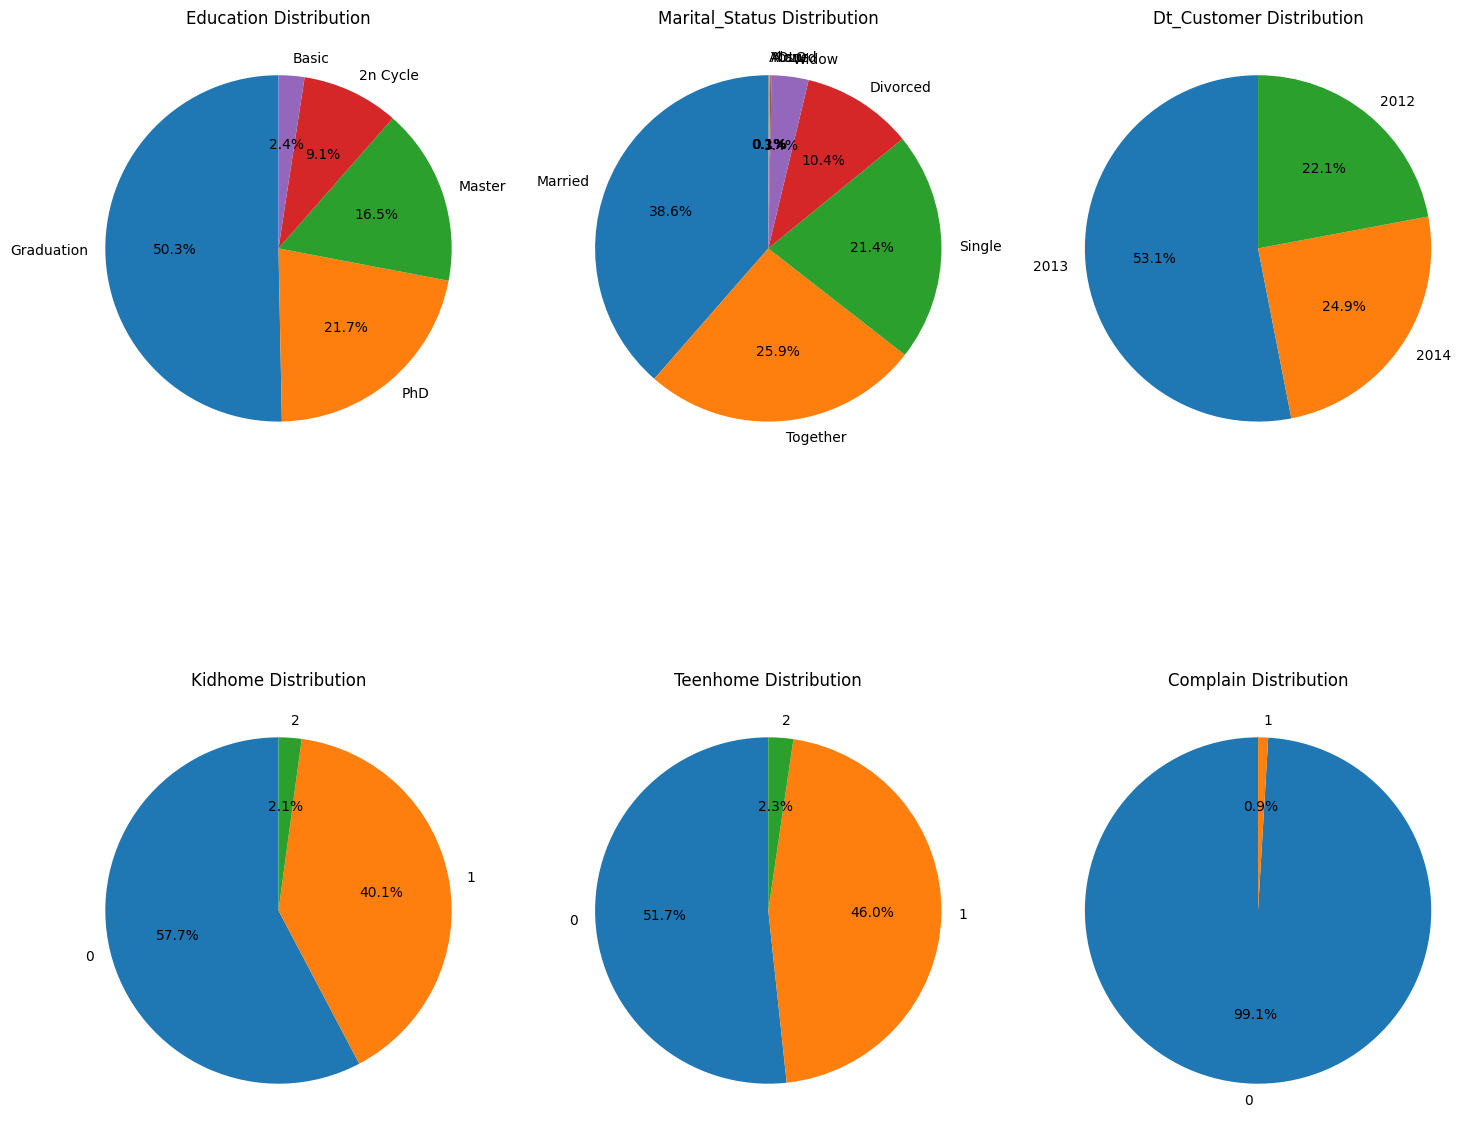

In [ ]:
cat_vars = ['Education', 'Marital_Status', 'Dt_Customer',
            'Kidhome', 'Teenhome', 'Complain']

# create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()





**NOW FOCUSSING ON THE NUMERICAL FEATURES OF THE DATASET**

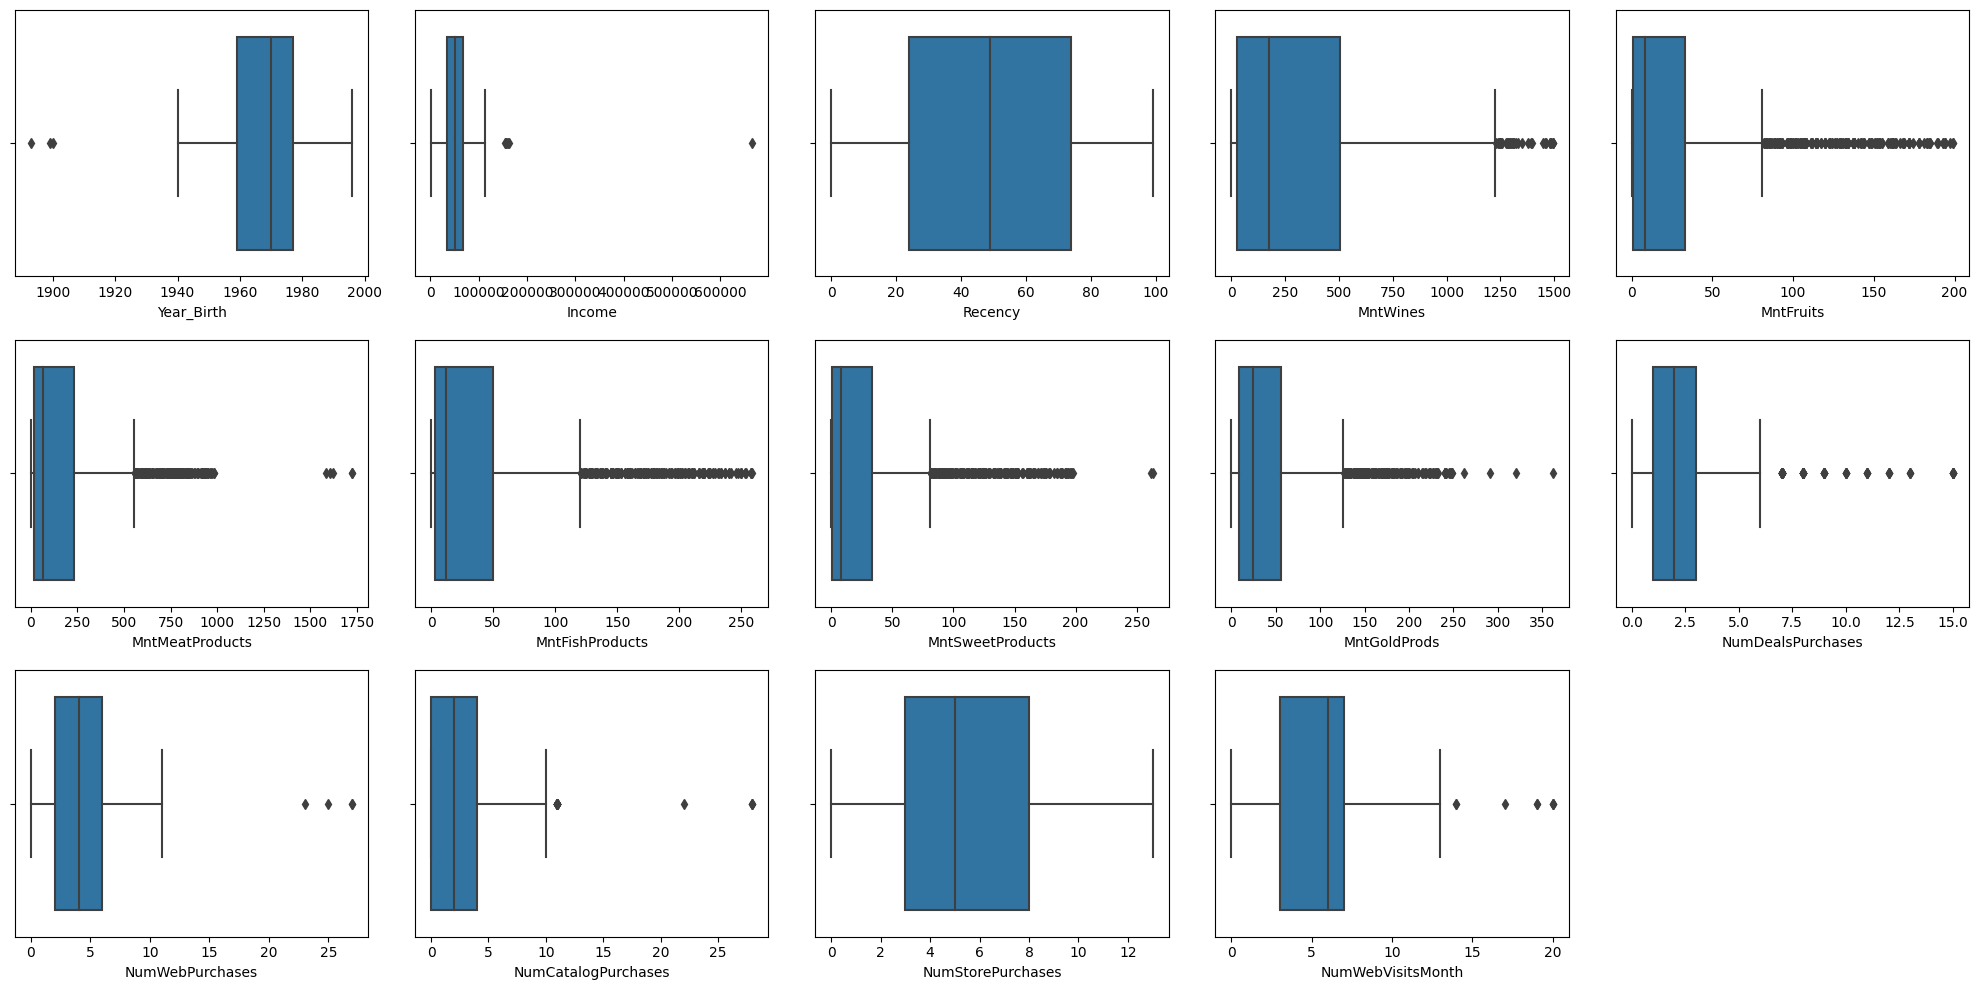

In [ ]:
num_vars = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
           'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

# remove the 15th subplot
fig.delaxes(axs[14])

plt.show()

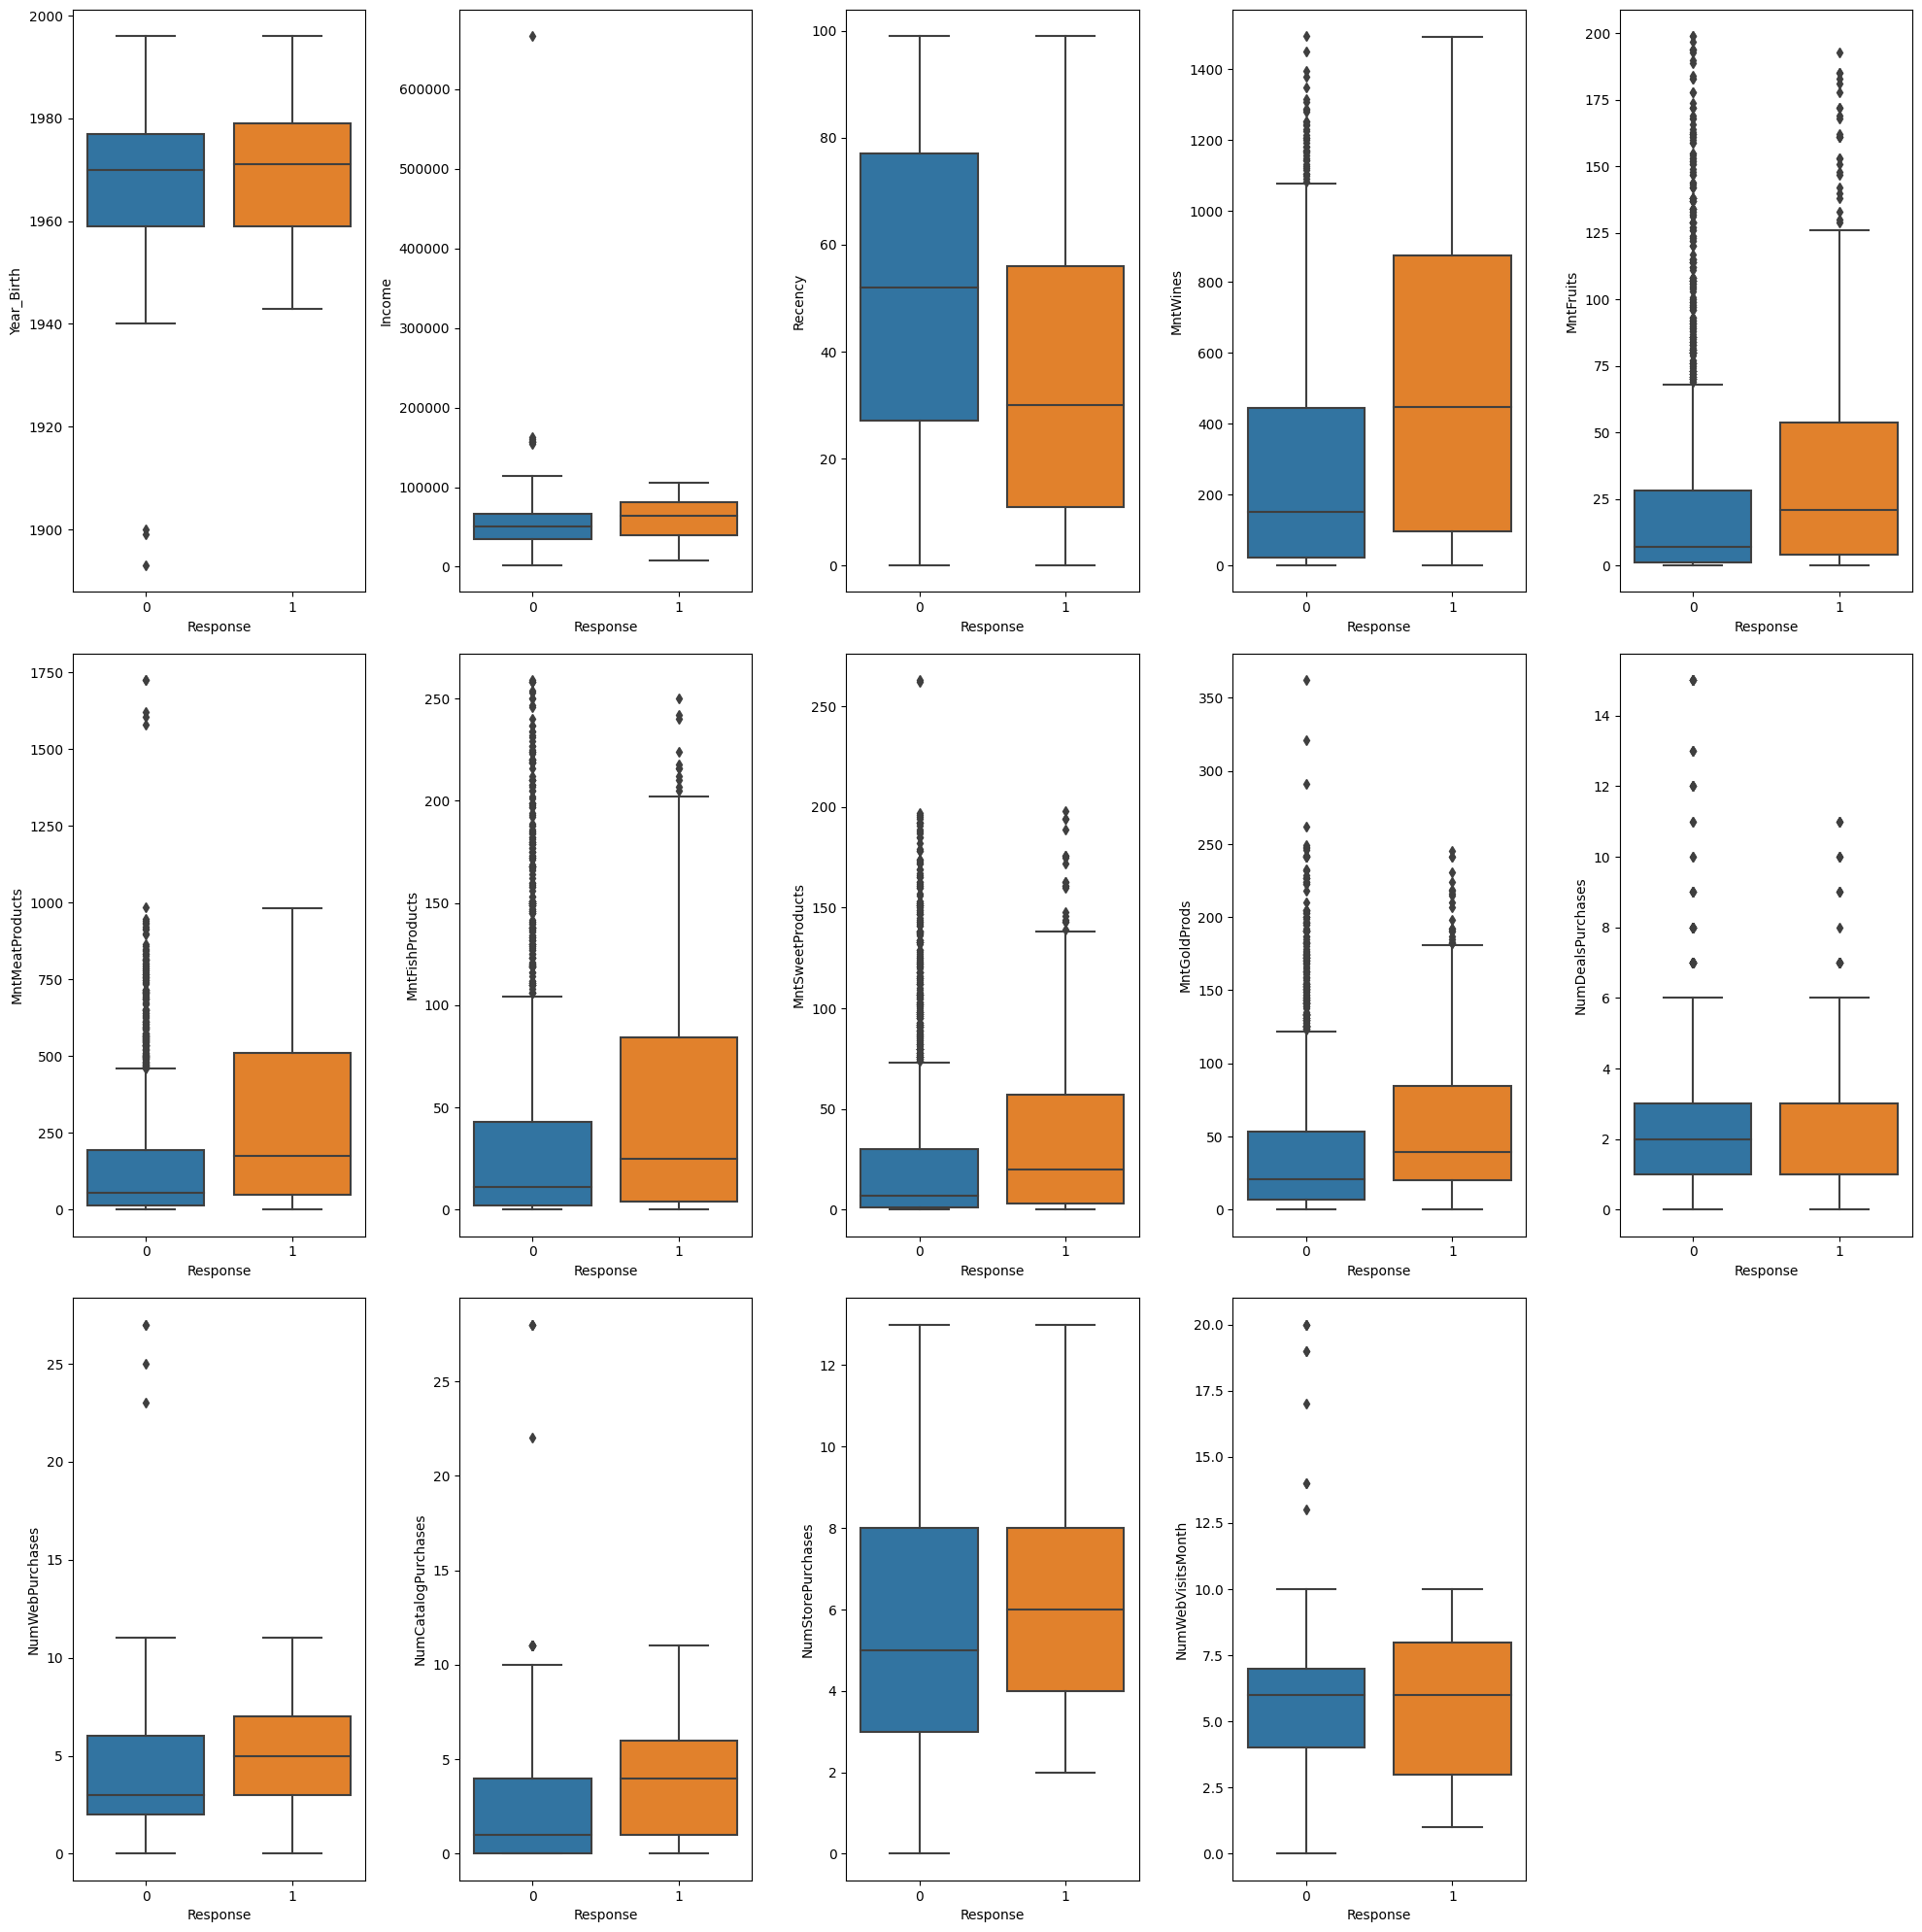

In [ ]:
num_vars = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
           'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x='Response', data=df, ax=axs[i])

fig.tight_layout()

# remove the 15th subplot
fig.delaxes(axs[14])

plt.show()

**DATA PREPOROCESSING TO DEAL WITH MISSING AND NULL VALUES IF ANY**

In [ ]:
#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Income    1.071429
dtype: float64

In [ ]:
df.shape

(2240, 21)

In [ ]:
# Drop null value because its only 1%
df.dropna(inplace=True)
df.shape

(2216, 21)

In [ ]:
# Drop Complain column because its very  unbalanced
df.drop(columns='Complain', inplace=True)
df.shape

(2216, 20)

**PERFORMING LABEL ENCODING FOR NON NUMERICAL COLUMNS**

In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Education: ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Marital_Status: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']
Dt_Customer: ['2014' '2013' '2012']


In [ ]:
#Replace 'YOLO' and 'Alone' with 'Single' in the 'Status' column
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO', 'Alone'], 'Single')
df['Marital_Status'] = df['Marital_Status'].replace(['Together'], 'Married')

In [ ]:
# Remove Dt_Customer because its irrelevant for prediction
df.drop(columns='Dt_Customer', inplace=True)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response
0,1970,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1
1,1961,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,1
2,1958,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0
3,1967,Graduation,Married,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0
4,1989,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1


In [ ]:
df1=df

In [ ]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Education: [2 4 0 3 1]
Marital_Status: [1 3 2 4 0]


<Axes: >

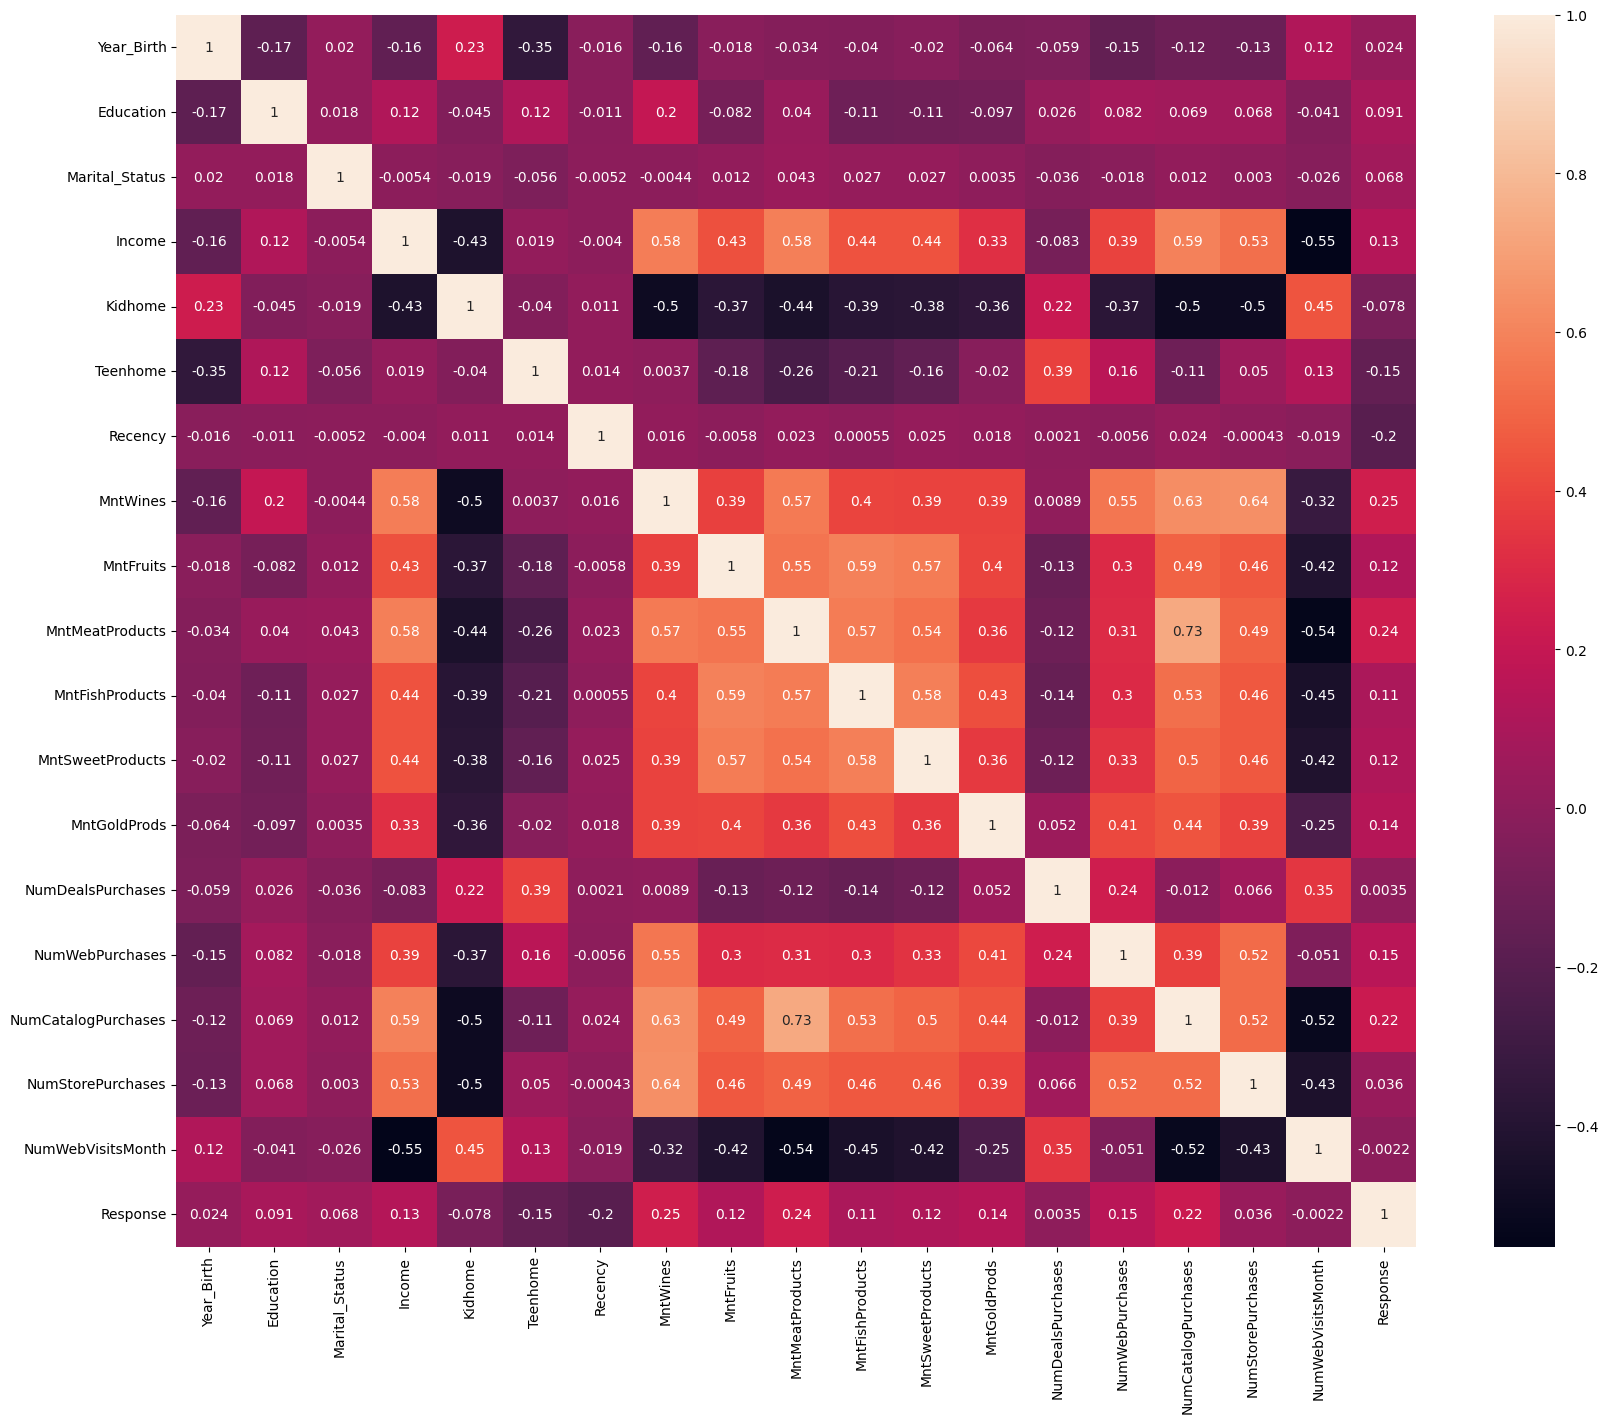

In [ ]:
#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [ ]:
import string
import seaborn as sns
sns.set_theme(style="whitegrid")

In [ ]:
values = np.array(df.corr())

corr_matrix = pd.DataFrame(values, columns = list(string.ascii_uppercase[:values.shape[1]]))
corr_matrix = corr_matrix.set_index(corr_matrix.columns)

In [ ]:
# Compute a correlation matrix and convert to long-form
corr_mat = corr_matrix.stack().reset_index(name="correlation")
corr_mat["abs_correlation"] = abs(corr_mat["correlation"])

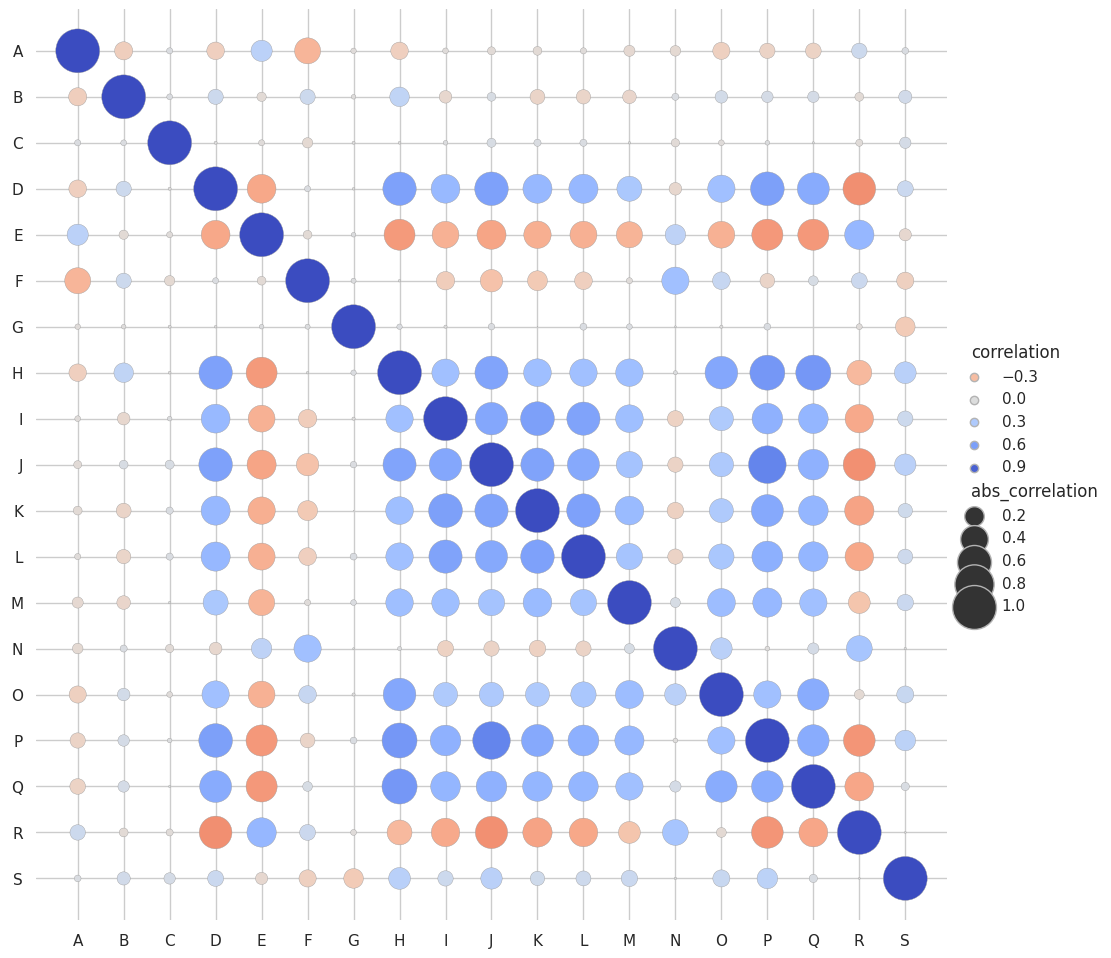

In [ ]:
# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="abs_correlation",
    palette="coolwarm_r", hue_norm=(-1, 1), edgecolor=".6",
    height=10, sizes=(0, 1000),
)

# Tweak the figure
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

**SPLITTING THE TRAINING AND TESTING DATA**

In [ ]:
from sklearn.model_selection import train_test_split
# Select the features (X) and the target variable (y)
X = df.drop('Response', axis=1)
y = df['Response']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**REMOVING THE OUTLIER DATA FROM DATA USING Z SCORE**

In [ ]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Year_Birth', 'Income', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'NumDealsPurchases','NumCatalogPurchases']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

**We provide data to 8 ML Classification Alghoritms and check which gives the best accuracy:**
1. Logistic Regression
2. SVC
3. KNN
4. Gauss
5. Decision Tree
6. Random Forest
7. PassiveAggresive
8. GBM

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

**1. LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)


0.8490990990990991

**2. SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn.svm import SVC
svc = SVC().fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.8468468468468469

**3. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8468468468468469

**4. GausNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB().fit(X_train,y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_test,y_pred)


0.7207207207207207

**5. DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.8108108108108109

**6. RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)


0.8536036036036037

**7. PASSIVEAGGRESIVE**

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa = PassiveAggressiveClassifier().fit(X_train,y_train)
y_pred = pa.predict(X_test)
accuracy_score(y_test,y_pred)

0.7567567567567568

**GRADIENT BOOSTING MACHINE**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier().fit(X_train,y_train)
y_pred = gbm.predict(X_test)
accuracy_score(y_test,y_pred)

0.8603603603603603

**WE SEE THAT GRADIENR BOOSTING MACHINE PROVIDES THE HIGHEST ACCURACY AMONGST ALL THESE ALGORITHMS**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train,y_train)
y_pred = gbm.predict(X_test)
accuracy_score(y_test,y_pred)

0.8626126126126126

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8626126126126126
Precision Score :  0.8626126126126126
Recall Score :  0.8626126126126126
Jaccard Score :  0.7584158415841584
Log Loss :  4.951943371027356


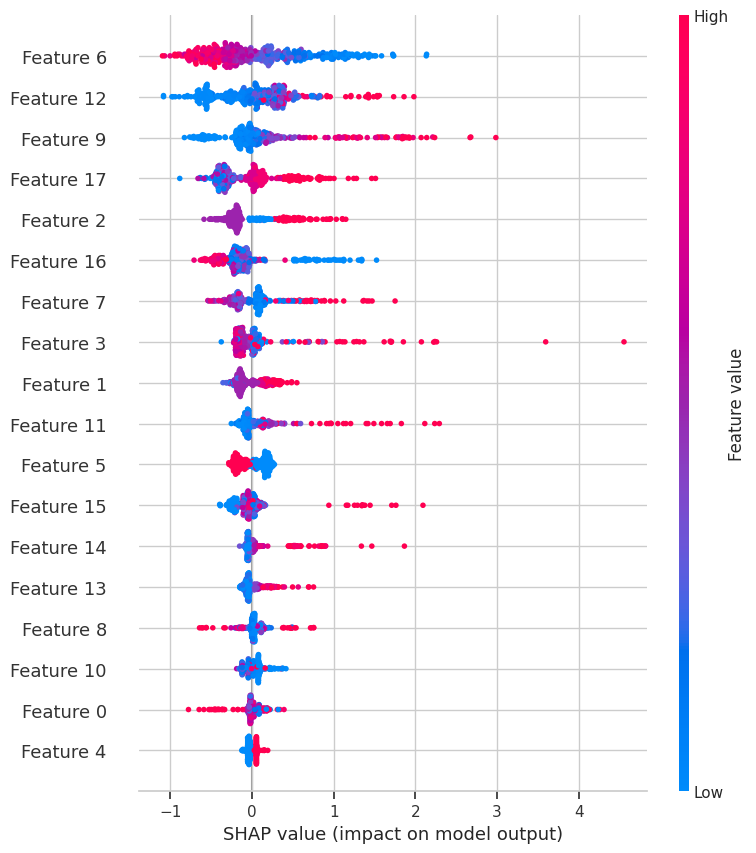

In [ ]:
import shap
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Text(0.5, 1.0, 'Accuracy Score for Gradient Boosting Machine: 0.8626126126126126')

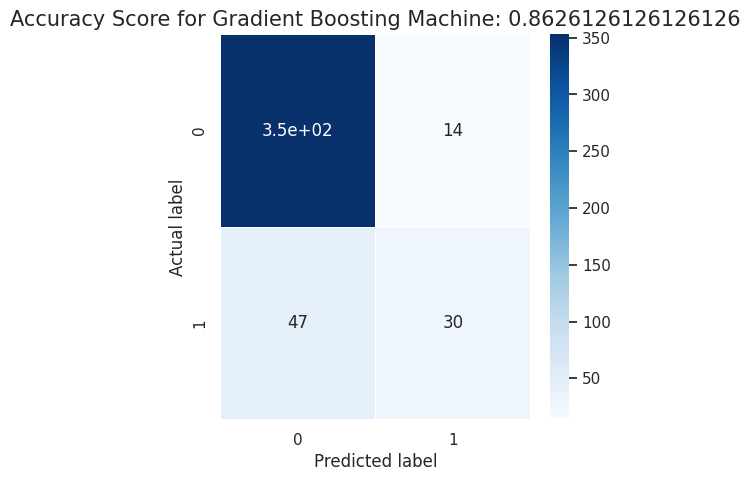

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Gradient Boosting Machine: {0}'.format(gbm.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

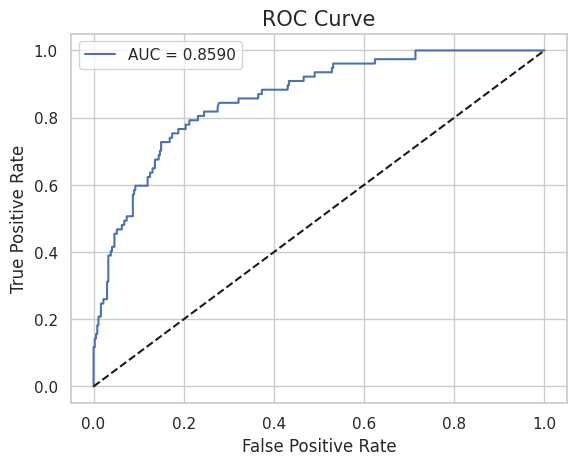

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = gbm.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()